A. Implement simple sampling from continuous distributions: uniform (min, max, sample_size) and gaussian (mu, sigma, sample_size)

In [1]:
import numpy as np
import random

p = np.random.uniform(2,5)
print(p)

ratio = random.random()
print(ratio)


2.0884817711847825
0.09864391175032694


uniform sampling

[4.023556477904007, 3.017148647761241, 4.948702800990761, 4.126279542867094, 2.1309175849030413, 4.35678367563769, 4.339309964766253, 4.637368864192277, 2.424711664445044, 3.2272219127968467, 3.9255705282225812, 2.0376618235500734, 3.8575204924703526, 4.350382211259438, 4.064573711628414, 4.3575560570703855, 4.856395527889586, 3.1997399328809806, 3.516152014946519, 2.7740688076401794, 2.0795854273534333, 3.371267862848354, 4.222625410372388, 4.0816410097684255, 4.123922269185174, 4.804539233127251, 3.6308721977813105, 3.1924407068929312, 4.372865912090847, 2.760156260737865, 2.0621458390916647, 4.965824207327815, 4.933698397756089, 2.821971093017927, 3.343663262846269, 3.7598317384616102, 3.605372483741083, 4.109277781269382, 4.67448292274905, 2.243225325895508, 3.7532732813900775, 2.4544998131185016, 3.5420003528811583, 3.5174547087116848, 3.937326795186804, 3.7773983798113084, 4.16138544034475, 4.544640664910393, 4.718853729377257, 3.177857319970759, 4.091346907195935, 3.516943264209

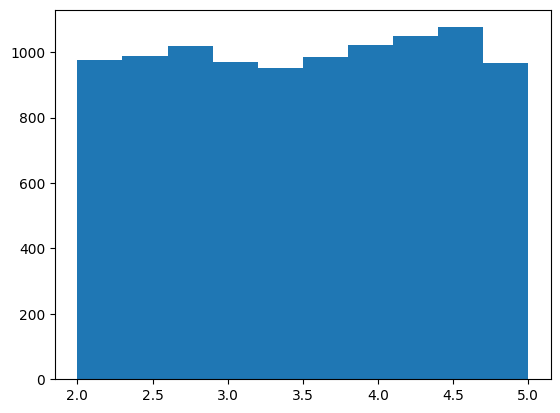

In [2]:
import random

def uniform_sampling(min, max, sample_size):
    samples = []
    for i in range(sample_size):
        ratio = random.random()
        sample = min + (max - min) * ratio
        samples.append(sample)
    return samples

samples = uniform_sampling(2, 5, 10000)
print(samples)

import matplotlib.pyplot as plt

plt.hist(samples, bins =10, range = (2,5))
plt.show()

Gaussian With no rejection sampling condition

1000000


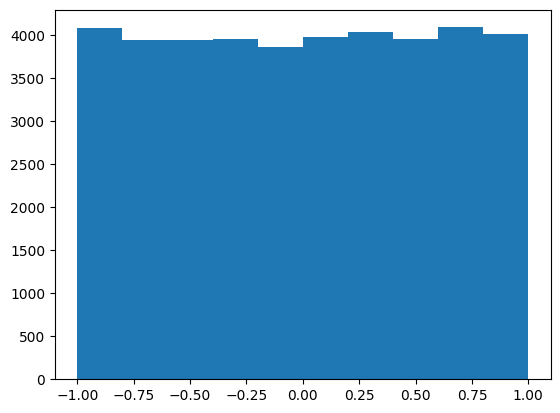

In [3]:
import math

def gaussian_pdf(x, mu, sigma):
    return (1.0 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gaussian_sampling(mu, sigma, sample_size):
    samples = []
    
    a = mu - 5 * sigma
    b = mu + 5 * sigma
    
    while len(samples) < sample_size:
        x = a + (b-a) * random.random()
        gaussian_pdf(x, mu, sigma)
        samples.append(x)
    return samples

samples = gaussian_sampling(0, 5, 1000000)
print(len(samples))

plt.hist(samples, bins = 10, range = (-1,1))
plt.show()


Gaussian With Rejection condition sampling

10000
30125


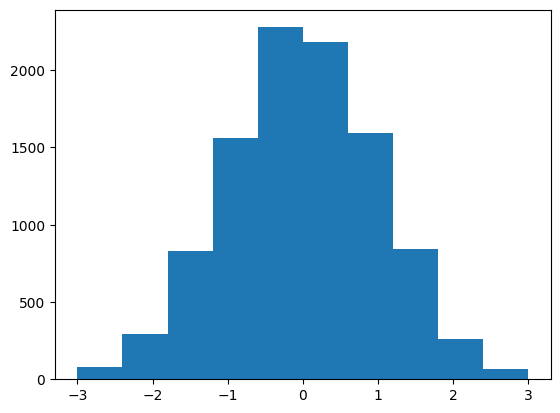

In [8]:
import math

def gaussian_pdf(x, mu, sigma):
    return (1.0 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gaussian_sampling(mu, sigma, sample_size):
    samples = []
    a = mu - 5  * sigma
    b = mu + 5 * sigma
    peak = gaussian_pdf(mu, mu, sigma)
    
    cnt = 0
    loss = 0
    while len(samples) < sample_size:
        x = a + (b-a) * random.random()
        compare = random.random()
        loss += 1
        if compare < gaussian_pdf(x, mu, sigma) / peak:
            samples.append(x)
        else:
            cnt += 1
    return samples, cnt

samples, cnt = gaussian_sampling(0, 1, 10000)
print(len(samples))
print(cnt)

plt.hist(samples, bins = 10, range = (-3,3))
plt.show()
    

Almost 4 times of the sample size has been rejected

B. Implement sampling from a 2-dim Gaussian Distribution (2d mu, 2d sigma, sample_size)

In [13]:
def sample_2d_gaussian(mu, sigma, sample_size):
    samples = []
    
    while len(samples) < sample_size:
        x = gaussian_sampling(mu[0], sigma[0], 1)[0]
        y= gaussian_sampling(mu[1], sigma[1], 1)[0]
        samples.append((x,y))
        
    return samples

In [14]:
samples = sample_2d_gaussian((0,10), (1,10), 100000)
print(len(samples))
print(samples[:10])
print(cnt)

100000
[([-0.5945239859699747], [-3.5211390063486334]), ([-0.29409529976023396], [31.303481032849135]), ([-0.06203644338349257], [1.7403822290694038]), ([1.8636923279071844], [-3.5581395524313137]), ([-0.13641682658670184], [15.956103693420943]), ([-0.14447109009054682], [-1.243439848220838]), ([0.4617171988311517], [6.980126002266154]), ([-0.4912291748748876], [5.915185362031828]), ([1.7901043068777778], [10.958483946591613]), ([-0.4589535568939276], [5.204750065594254])]
30125


[[-0.5945239859699747], [-0.29409529976023396], [-0.06203644338349257], [1.8636923279071844], [-0.13641682658670184], [-0.14447109009054682], [0.4617171988311517], [-0.4912291748748876], [1.7901043068777778], [-0.4589535568939276], [-1.5653861528115054], [1.5985291361598168], [-0.9486025477807472], [-1.5195918508738329], [-1.024754968244789], [-0.5330932979806589], [1.740460250782748], [-1.1029347361039576], [-0.4589945304202061], [-0.09198071486470027], [0.6349436788321103], [1.575810204984398], [0.6006706403132931], [0.7131179036696844], [-1.0106767366849634], [-0.6554929380950449], [-1.2471054898649134], [-0.3128894542260241], [0.49426759852205127], [-0.222552795788733], [-5.0685569759956195e-05], [0.4862404337127666], [2.167057255288012], [0.2171361173838502], [-0.4342664724515446], [0.19649545455860373], [0.5082439608797529], [0.4555864560127567], [0.5370841456206819], [-0.6205847612779021], [0.3645390867709217], [-1.4646108941619849], [1.3055005800221666], [0.19316018602466034], 

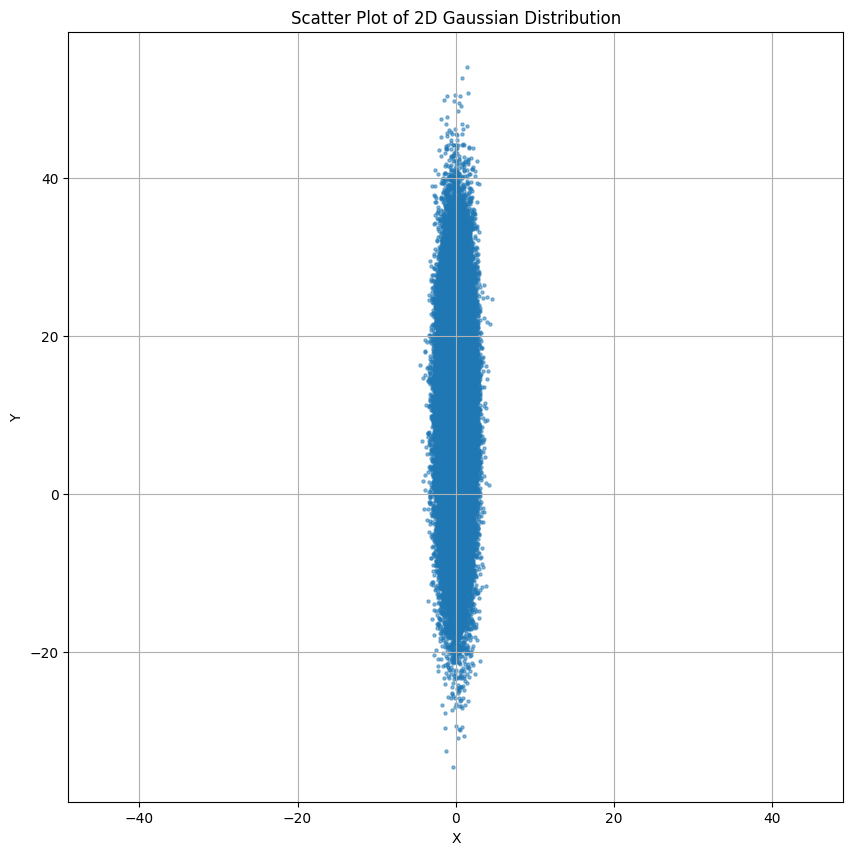

In [15]:
x_vals = [sample[0] for sample in samples]
y_vals = [sample[1] for sample in samples]

print(x_vals)
print(y_vals)

plt.figure(figsize=(10, 10))
plt.scatter(x_vals, y_vals, alpha=0.5, s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of 2D Gaussian Distribution')
plt.axis('equal')
plt.grid(True)
plt.show()

With sigma 0 , 10 -> get eclipse

C. Implement wihtout-replacement sampling from a discrete non-uniform distribution (given as input) following the Steven's method described in class ( paper ). Test it on desired sample sizes N significantly smaller than population size M (for example N=20 M=300)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

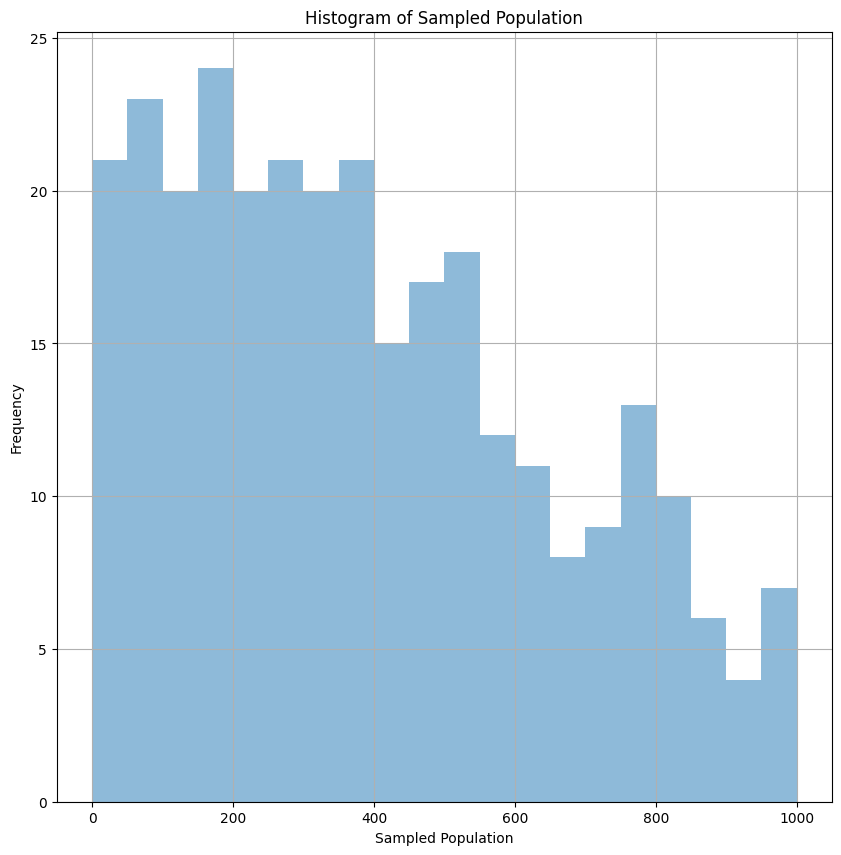

In [3]:
import random
import math
import matplotlib.pyplot as plt

def steven_sampling(population, weights, sample_size):
    '''
    Steven's sampling method
    
    Higher w -> higher key (but with random u value)
    after sorting with key value
    sample the item with the sample size.
    '''
    keys = []
    
    for item, w in zip(population, weights):
        u = random.random()
        key = u ** (1.0 / w)
        keys.append((key, item))
        
    keys.sort(reverse=True)
    sampled = [item for _, item in keys[:sample_size]]
    return sampled


M = 1000
N = 300

population = [i for i in range(M)]
print(population)
# weights = [random.uniform(0.1, 0.9) for _ in range(M)] # random weights
# weights = [0.1 + (0.8 * i / (M - 1)) for i in range(M)] # increasing weights
weights = [0.9 - (0.8 * i / (M - 1)) for i in range(M)] # decreasing weights
print(weights)


samples = steven_sampling(population, weights, N)
print(samples)


weights_sum = sum(weights)
total_weights_avg = weights_sum / M
print(f"total_weights_avg: {total_weights_avg}")

sample_weights = [weights[i] for i in samples]

avg_weight = sum(sample_weights) / N
print(f"avg_weight of sample: {avg_weight}")

plt.figure(figsize=(10, 10))
plt.hist(samples, bins=20, range=(0, M), alpha=0.5)
plt.xlabel('Sampled Population')
plt.ylabel('Frequency')
plt.title('Histogram of Sampled Population')
plt.grid(True)

